# Model inference

In [42]:
import pickle
import gentype
import numpy as np
import matplotlib.pyplot as plt

## 1) Load Data, Preprocess

Loads the fetched X_matrix and preprocess it into the right format.
TODO Link index directly with corresponding individual


In [3]:
file1 = open("X_matrix", "rb")

In [4]:
X_matrix = pickle.load(file1)

In [30]:
X_matrix_allele_1 = X_matrix[:,0]
X_matrix_allele_2 = X_matrix[:,1]

X_matrix_al = np.concatenate((X_matrix_allele_1, X_matrix_allele_2), axis = 0)
X_matrix_geno = X_matrix_allele_1 + X_matrix_allele_2

## 2) Model training
Trains the model, TODO try different prior initilizations


In [6]:
model = gentype.PiCollapsedNonparametricGibbsSampler(1)

In [34]:
X_matrix_al.sum(axis=1).mean()

12.788538338658148

In [36]:
X_matrix_geno.sum(axis=1).mean()

25.577076677316295

In [39]:
model.fit(X_matrix_al, num_burn_in_steps = 100, delta = 2)

Iteration: 1; Current clusters: 11; Likelihood: -228356.163
Iteration: 2; Current clusters: 8; Likelihood: -214525.651
Iteration: 3; Current clusters: 8; Likelihood: -210010.749
Iteration: 4; Current clusters: 8; Likelihood: -208462.123
Iteration: 5; Current clusters: 8; Likelihood: -208160.347
Iteration: 6; Current clusters: 8; Likelihood: -207999.115
Iteration: 7; Current clusters: 8; Likelihood: -207909.806
Iteration: 8; Current clusters: 8; Likelihood: -207961.448
Iteration: 9; Current clusters: 8; Likelihood: -207969.345
Iteration: 10; Current clusters: 8; Likelihood: -207864.484
Iteration: 11; Current clusters: 8; Likelihood: -207868.417
Iteration: 12; Current clusters: 8; Likelihood: -207888.649
Iteration: 13; Current clusters: 8; Likelihood: -207802.708
Iteration: 14; Current clusters: 8; Likelihood: -207738.894
Iteration: 15; Current clusters: 8; Likelihood: -207808.206
Iteration: 16; Current clusters: 8; Likelihood: -207867.807
Iteration: 17; Current clusters: 8; Likelihood: 

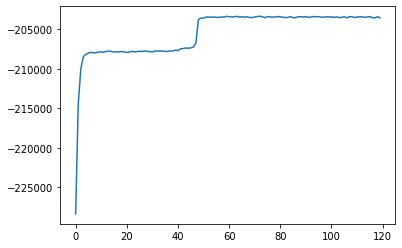

In [43]:
plt.plot(model.ll_list)

## 3) Model evalutation
...

In [45]:
clustering = model.Z

In [48]:
cluster1 = X_matrix_al[clustering == 0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Here you can see the variational frequencies of a the first cluster

In [53]:
print(list(cluster1.sum(axis=0)))

[30.0, 1.0, 0.0, 0.0, 0.0, 4.0, 1.0, 1.0, 1.0, 0.0, 5.0, 0.0, 0.0, 5.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 3.0, 20.0, 30.0, 1.0, 4.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1274.0, 7.0, 2.0, 2.0, 34.0, 2.0, 0.0, 2.0, 0.0, 105.0, 0.0, 0.0, 0.0, 1.0, 20.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0, 5.0, 1.0, 2.0, 0.0, 12.0, 0.0, 1.0, 2.0, 25.0, 0.0, 1.0, 371.0, 0.0, 13.0, 0.0, 370.0, 0.0, 1.0, 2.0, 0.0, 1.0, 1.0, 13.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 10.0, 0.0, 1.0, 0.0, 15.0, 1.0, 2.0, 0.0, 47.0, 0.0, 0.0, 0.0, 0.0, 31.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 1.0, 17.0, 0.0, 0.0, 1.0, 1.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 71.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 1.0, 4.0, 0.0, 3.0, 216.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0,

In [54]:
model.theta[0]

array([4.68014663e-03, 5.50934719e-04, 5.74819116e-05, 3.25779071e-04,
       1.24033955e-04, 3.91295324e-04, 7.12719099e-04, 4.28293874e-04,
       1.11803746e-04, 1.64733660e-04, 5.99349042e-04, 1.68658792e-04,
       3.86785251e-05, 1.13261244e-03, 1.15580593e-04, 1.27965915e-04,
       3.19497187e-04, 3.01523710e-04, 6.58332625e-05, 1.55345546e-05,
       2.19574578e-04, 1.54098537e-04, 1.48216752e-04, 3.30337465e-04,
       1.19442857e-04, 6.38681082e-05, 6.72453997e-04, 3.86816121e-03,
       4.82784795e-03, 4.84396068e-04, 4.64199611e-04, 6.50744453e-04,
       3.74093888e-04, 3.71592897e-05, 2.18195767e-05, 1.74846338e-04,
       3.23824186e-05, 1.80261046e-01, 6.73550667e-04, 2.54665778e-04,
       4.64776310e-04, 4.13149756e-03, 5.85302143e-04, 5.35811989e-05,
       3.03045869e-04, 2.18894752e-04, 1.42144685e-02, 1.05448810e-04,
       5.21198268e-06, 7.64922042e-04, 6.30627243e-04, 4.51730080e-03,
       1.00422773e-04, 1.64857804e-04, 1.04679177e-03, 2.44935623e-04,
      